## Import 

In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds



In [5]:
import matplotlib.pyplot as plt
import pandas as pd


## Load Data

In [8]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'plant_village',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    batch_size =None,
    with_info=True,
    as_supervised=True,
    shuffle_files=False
    )

In [10]:
categories_counts = {}

for image, item in train_ds:
    category = item.numpy()
    if category in categories_counts:
        categories_counts[category] += 1
    else:
        categories_counts[category] = 1

# Affichez les résultats
for category, count in categories_counts.items():
    print(f"Catégorie {category}: {count} occurrence(s)")

Catégorie 16: 595 occurrence(s)
Catégorie 27: 298 occurrence(s)
Catégorie 0: 172 occurrence(s)
Catégorie 24: 1296 occurrence(s)
Catégorie 37: 1309 occurrence(s)
Catégorie 9: 315 occurrence(s)
Catégorie 4: 392 occurrence(s)
Catégorie 30: 385 occurrence(s)
Catégorie 31: 484 occurrence(s)
Catégorie 1: 154 occurrence(s)
Catégorie 28: 535 occurrence(s)
Catégorie 11: 298 occurrence(s)
Catégorie 35: 346 occurrence(s)
Catégorie 15: 1355 occurrence(s)
Catégorie 12: 349 occurrence(s)
Catégorie 34: 449 occurrence(s)
Catégorie 6: 265 occurrence(s)
Catégorie 22: 243 occurrence(s)
Catégorie 18: 260 occurrence(s)
Catégorie 10: 236 occurrence(s)
Catégorie 3: 405 occurrence(s)
Catégorie 32: 253 occurrence(s)
Catégorie 8: 305 occurrence(s)
Catégorie 19: 354 occurrence(s)
Catégorie 20: 227 occurrence(s)
Catégorie 25: 436 occurrence(s)
Catégorie 29: 221 occurrence(s)
Catégorie 14: 276 occurrence(s)
Catégorie 36: 95 occurrence(s)
Catégorie 33: 397 occurrence(s)
Catégorie 23: 105 occurrence(s)
Catégorie 7: 

[]

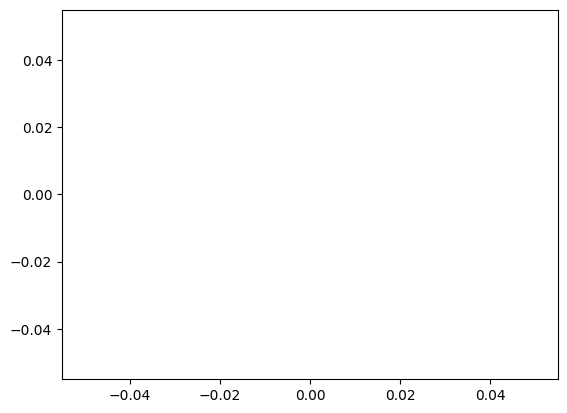

In [41]:
plt.plot(kind='bar')

,image,label
0,,15 (Orange___Haunglongbing_(Citrus_greening))
1,,16 (Peach___Bacterial_spot)
2,,16 (Peach___Bacterial_spot)
3,,9 (Corn___healthy)
4,,25 (Squash___Powdery_mildew)

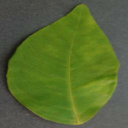
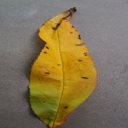
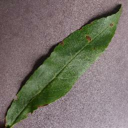
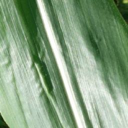
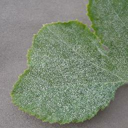

In [42]:
tfds.as_dataframe(train_ds.take(5), metadata)

In [43]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)
test_ds = test_ds.batch(32)

In [10]:
test_ds.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=170>

In [167]:
for image, labels in train_ds.take(2): 
    print(image.shape)

(16, 256, 256, 3)
(16, 256, 256, 3)


## Model

In [49]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(256,256,3)),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.CenterCrop(height=224, width=224), 
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.Conv2D(64, 4, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(246, activation='relu'),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 center_crop_1 (CenterCrop)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 conv2d_2 (Conv2D)           (None, 221, 221, 64)      3136      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                  

Epoch 1/2
136/136 [==============================] - 28s 192ms/step - loss: 2.2103 - accuracy: 0.4400 - val_loss: 0.9233 - val_accuracy: 0.7535
Epoch 2/2
136/136 [==============================] - 26s 195ms/step - loss: 0.9357 - accuracy: 0.7300 - val_loss: 0.4320 - val_accuracy: 0.8912
Epoch 1/2
136/136 [==============================] - 26s 190ms/step - loss: 0.5914 - accuracy: 0.8164 - val_loss: 0.2279 - val_accuracy: 0.9410
Epoch 2/2
136/136 [==============================] - 26s 191ms/step - loss: 0.4151 - accuracy: 0.8688 - val_loss: 0.1655 - val_accuracy: 0.9653
Epoch 1/2
136/136 [==============================] - 26s 193ms/step - loss: 0.3316 - accuracy: 0.8920 - val_loss: 0.1307 - val_accuracy: 0.9676
Epoch 2/2
136/136 [==============================] - 26s 193ms/step - loss: 0.2603 - accuracy: 0.9175 - val_loss: 0.0992 - val_accuracy: 0.9711
Epoch 1/2
136/136 [==============================] - 26s 191ms/step - loss: 0.2191 - accuracy: 0.9272 - val_loss: 0.0690 - val_accuracy:

In [259]:
train_ds.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=1358>

In [83]:
initial_learning_rate = 0.0015
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=3000,  
    decay_rate=0.9  
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [122]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping


es = EarlyStopping(patience=3, restore_best_weights=True)


In [22]:
model.fit(train_ds,
          callbacks=es,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/layers/preprocessing/image_preprocessing.py", line 451, in call
        raise ValueError(

    ValueError: Exception encountered when calling layer 'random_flip_2' (type RandomFlip).
    
    Image augmentation layers are expecting inputs to be rank 3 (HWC) or 4D (NHWC) tensors. Got shape: (None, None, None, None, 3)
    
    Call arguments received by layer 'random_flip_2' (type RandomFlip):
      • inputs=tf.Tensor(shape=(None, None, None, None, 3), dtype=float32)
      • training=True


In [260]:
model.evaluate(test_ds)

170/170 [==============================] - 27s 156ms/step - loss: 0.2521 - accuracy: 0.9204


[0.25206902623176575, 0.9204419851303101]

## Transfer Learning 

In [253]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

gigi = tf.keras.applications.VGG16(
    input_shape=(256,256,3),
    include_top=False,
    weights='imagenet'
)
gigi.trainable = False
model = tf.keras.Sequential([
  gigi,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(38, activation='softmax')
])


# Afficher les informations sur le modèle
model.summary()



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_24 (Flatten)        (None, 32768)             0         
                                                                 
 dense_100 (Dense)           (None, 128)               4194432   
                                                                 
 dropout_62 (Dropout)        (None, 128)               0         
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dropout_63 (Dropout)        (None, 64)                0         
                                                                 
 dense_102 (Dense)           (None, 38)              

In [14]:
i = tf.keras.layers.Input([None, None, 3], dtype=tf.uint8)
x = tf.cast(i, tf.float32)
x = tf.keras.applications.vgg16.preprocess_input(x)
gigi = tf.keras.applications.VGG16(include_top=False, weights='imagenet')

# Geler les poids du noyau
gigi.trainable = False

x = gigi(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.15)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(38, activation='softmax')(x)
model = tf.keras.Model(inputs=[i], outputs=[x])


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 tf.cast (TFOpLambda)        (None, None, None, 3)     0         
                                                                 
 tf.__operators__.getitem (S  (None, None, None, 3)    0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, None, None, 3)    0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                      

In [15]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1200,  
    decay_rate=0.9  
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [16]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [233]:
core1 = gigi.get_layer('block5_conv2')
core2 = gigi.get_layer('block5_conv3')

core1.trainable = True 
core2.trainable = True

In [239]:
for i, layer in enumerate(gigi.layers):
    print(i, layer.name, layer.trainable)

0 input_60 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool False


In [241]:
history = model.fit(train_ds,
        validation_data=val_ds,
          epochs=25, 
          callbacks = es)

Epoch 1/25
1358/1358 [==============================] - 241s 176ms/step - loss: 0.0883 - accuracy: 0.9711 - val_loss: 0.1122 - val_accuracy: 0.9676
Epoch 2/25
1358/1358 [==============================] - 239s 176ms/step - loss: 0.0741 - accuracy: 0.9751 - val_loss: 0.1012 - val_accuracy: 0.9693
Epoch 3/25
 355/1358 [======>.......................] - ETA: 2:36 - loss: 0.0621 - accuracy: 0.9789

KeyboardInterrupt: 

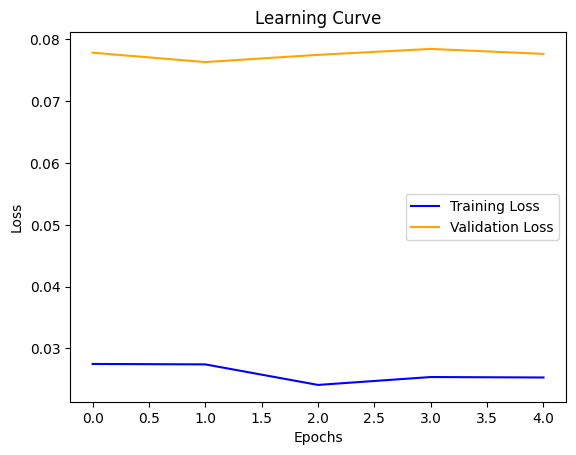

In [248]:
train_loss = history.history['loss']

if 'val_loss' in history.history:
    val_loss = history.history['val_loss']
    has_val_loss = True
else:
    has_val_loss = False

# Set up the plot
plt.plot(train_loss, color='blue',  label='Training Loss')

# If validation loss is available, plot it as well
if has_val_loss:
    plt.plot(val_loss,color='orange', label='Validation Loss')

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


## SPEED TRAIN 

In [11]:
for epoch in range(5) : 
    train_chunk_d = train_ds.shuffle(buffer_size=1000).take(round(len(train_ds) * 0.1))  # 20% pour l'entraînement
    val_chunk_ds = train_chunk_ds.skip(round(len(train_chunk_ds) * 0.8))  # 20% pour le du chunk pour le val
    model.fit(train_chunk_ds, 
              validation_data=val_chunk_ds,
              epochs=2)

NameError: name 'model' is not defined

In [33]:

for epoch in range(10, 90, 10):
    dataset, metadata = tfds.load(
        'plant_village',
        split=f'train[{epoch-10}%:{epoch}%]',
        batch_size=32,
        with_info=True,
        as_supervised=True,
        shuffle_files=False
    )
    
    # Séparer le jeu de données en entraînement et validation
    train_ds = dataset.take(round(len(dataset) * 0.8))  # 90% pour l'entraînement
    val_ds = dataset.skip(round(len(dataset) * 0.8))  # 10% pour la validation
    
    model.fit(train_ds, 
              validation_data=val_ds,
              epochs=2)

Epoch 1/2
136/136 [==============================] - 37s 228ms/step - loss: 2.3350 - accuracy: 0.4143 - val_loss: 1.2526 - val_accuracy: 0.6911
Epoch 2/2
136/136 [==============================] - 26s 191ms/step - loss: 1.0773 - accuracy: 0.6923 - val_loss: 0.6334 - val_accuracy: 0.8228
Epoch 1/2
136/136 [==============================] - 32s 236ms/step - loss: 0.7335 - accuracy: 0.7794 - val_loss: 0.4694 - val_accuracy: 0.8610
Epoch 2/2
136/136 [==============================] - 27s 198ms/step - loss: 0.5086 - accuracy: 0.8389 - val_loss: 0.3736 - val_accuracy: 0.8804
Epoch 1/2
136/136 [==============================] - 27s 199ms/step - loss: 0.5097 - accuracy: 0.8346 - val_loss: 0.2709 - val_accuracy: 0.9304
Epoch 2/2
136/136 [==============================] - 27s 201ms/step - loss: 0.3852 - accuracy: 0.8768 - val_loss: 0.2286 - val_accuracy: 0.9276
Epoch 1/2
136/136 [==============================] - 28s 204ms/step - loss: 0.3995 - accuracy: 0.8752 - val_loss: 0.2416 - val_accuracy:

In [34]:
test_ds, metadata = tfds.load(
        'plant_village',
        split=f'train[90%:100%]',
        batch_size=32,
        with_info=True,
        as_supervised=True,
        shuffle_files=False
    )

In [36]:
model.evaluate(test_ds)

170/170 [==============================] - 26s 151ms/step - loss: 0.1609 - accuracy: 0.9453


[0.16091518104076385, 0.9453038573265076]